In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
train_data = pd.read_csv(r'C:\Users\Greg\Downloads\train.csv')
test_data = pd.read_csv(r'C:\Users\Greg\Downloads\test.csv')

In [76]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


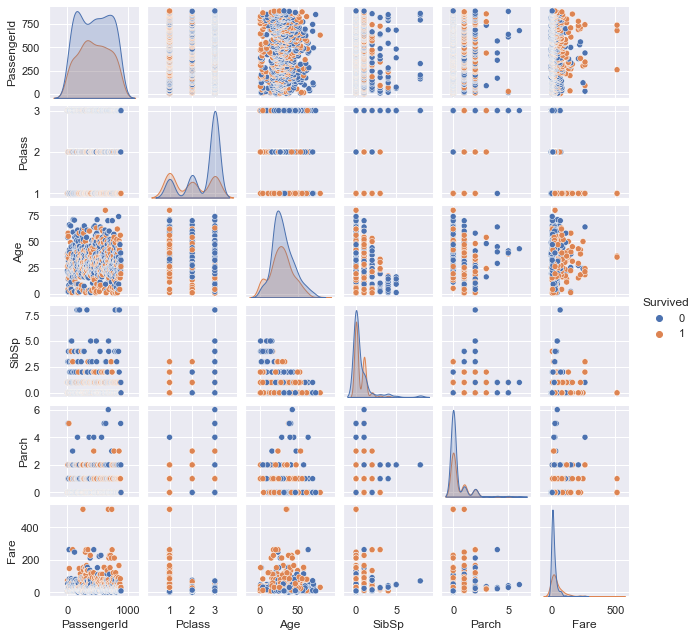

In [77]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(train_data, hue='Survived', height=1.5);

In [104]:
#I actually don't hate the way that other guy did it.

X_Titanic['Sex'] = X_Titanic['Sex'].replace(['male'], 1)
X_Titanic['Sex'] = X_Titanic['Sex'].replace(['female'], 2)
Features = ['PassengerId' ,'Pclass', 'Sex', 'SibSp','Parch']
X_Titanic = X_Titanic[Features]
X_Titanic.head()



,PassengerId,Pclass,Sex,SibSp,Parch
0,1,3,1,1,0
1,2,1,2,1,0
2,3,3,2,0,0
3,4,1,2,1,0
4,5,3,1,0,0


In [105]:
y_titanic = train_data['Survived']
y_titanic.shape


(891,)

In [106]:
X_Titanic.shape

(891, 5)

In [107]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_Titanic, y_titanic,random_state=1)


In [110]:
test_data['Sex'] = test_data['Sex'].replace(['male'], 1)
test_data['Sex'] = test_data['Sex'].replace(['female'], 2)
#test_data['Fare'] = test_data['Fare'].astype(int)
#test_data.dropna(axis = 'columns')
test_data.head()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.7713004484304933

In [113]:
test_data[Features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   SibSp        418 non-null    int64
 4   Parch        418 non-null    int64
dtypes: int64(5)
memory usage: 16.5 KB


In [114]:
Test_features = pd.get_dummies(test_data[Features])

In [115]:
test_model = model.predict(Test_features)

In [116]:
output = pd.DataFrame()

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_model})

In [118]:
output.to_csv(r'C:\Users\Greg\Downloads\submission.csv', index=False)

#pd.read_csv(r'C:\Users\Greg\Downloads\test.csv')


In [ ]:
import os
os.makedirs('folder/subfolder', exist_ok=True)
df.to_csv('folder/subfolder/out.csv')